# Impoting data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("SalesAnalysis.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Cleaning data

In [7]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
data.dropna(how='all', inplace=True)

In [11]:
data = data[data["Order Date"].str[0:2] != 'Or']

In [16]:
data["Price Each"] = pd.to_numeric(data["Price Each"])
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])

In [44]:
data["Month"] = pd.to_datetime(data['Order Date']).dt.month
data["Month"] = data["Month"].astype('int32')

In [49]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [51]:
data['city'] = data['Purchase Address'].apply(lambda x: x.split('t,')[1])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215"
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001"


In [52]:
data['Sales'] = data['Price Each']*data['Quantity Ordered']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,"Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA 90001",11.99


# Data Exploration

In [53]:
data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [56]:
months = range(1,13)

Text(0.5, 0, 'Month number')

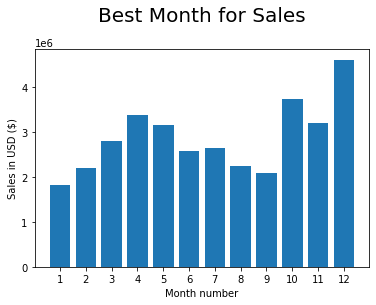

In [59]:
plt.title("Best Month for Sales\n" , fontsize=20 , color='black')
plt.bar(months,data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')


In [60]:
data[data['Month']==12]["Sales"].sum()

4613443.34

([<matplotlib.axis.XTick at 0x222be3da6d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

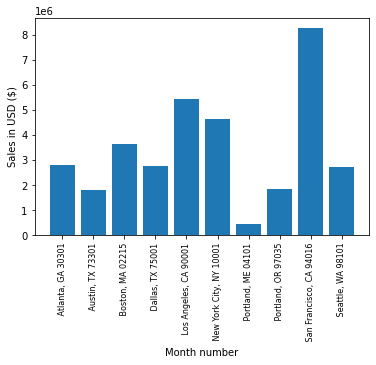

In [64]:
cities = [city for city, x in data.groupby(['city'])]
plt.bar(cities,data.groupby(['city']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(cities, rotation='vertical', size=8)

In [65]:
data['hour'] = pd.to_datetime(data['Order Date']).dt.hour

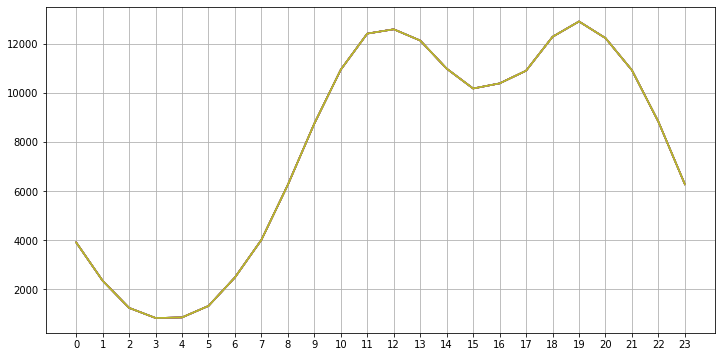

In [66]:
plt.figure(figsize=(12,6))
hours = [hour for hour,x in data.groupby('hour')]
plt.plot(hours , data.groupby('hour').count())
plt.xticks(hours)
plt.grid()

In [69]:
most_product = data.groupby("Product").sum()

([<matplotlib.axis.XTick at 0x222bac125e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

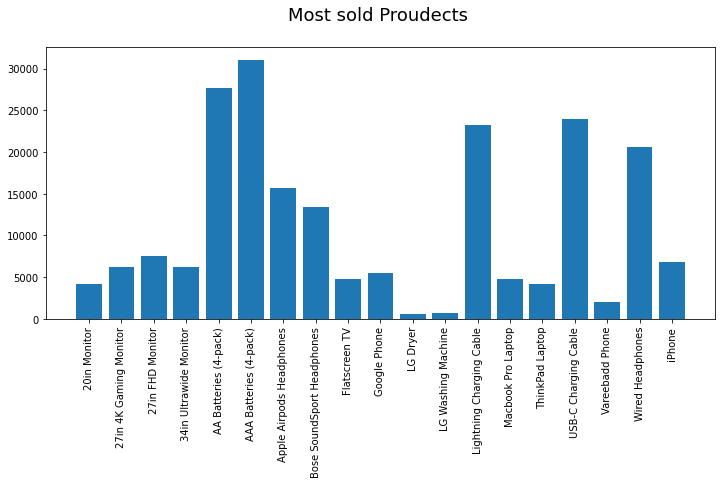

In [77]:
products = [product for product,x in data.groupby('Product')]
plt.figure(figsize=(12,5))
plt.title("Most sold Proudects \n", fontsize= 18)
plt.bar(products , most_product['Quantity Ordered'])
plt.xticks(products , rotation=90)